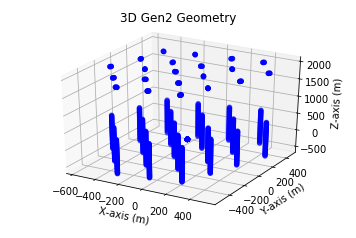

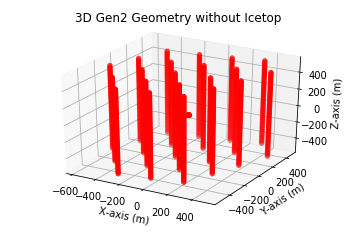

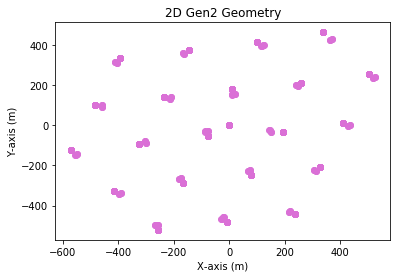

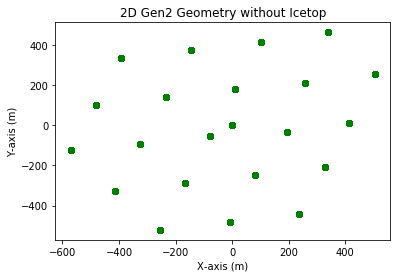

In [13]:
import sys, os
from icecube import icetray, dataclasses, dataio
from I3Tray import I3Tray
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

gcdFile = dataio.I3File('/cvmfs/icecube.opensciencegrid.org/data/GCD/GeoCalibDetectorStatus_2020.Run134142.Pass2_V0.i3.gz')
frame = gcdFile.pop_frame()

while not frame.Has('I3Geometry'):
    frame = gcdFile.pop_frame()
geometry = frame.Get('I3Geometry')
om_geometry = geometry.omgeo

dom_x_positions=np.zeros((87,67))
dom_y_positions=np.zeros((87,67))
dom_z_positions=np.zeros((87,67))

for om, geo_info in om_geometry:
    dom_x_positions[om[0],om[1]]=geo_info.position.x
    dom_y_positions[om[0],om[1]]=geo_info.position.y
    dom_z_positions[om[0],om[1]]=geo_info.position.z
#places the selected string numbers of x, y, z positions into a new array
gen2_dom_x_positions = np.concatenate((dom_x_positions[1:6:2], dom_x_positions[14:21:2], dom_x_positions[31:40:2], dom_x_positions[51:60:2], dom_x_positions[68:75:2]))
gen2_dom_y_positions = np.concatenate((dom_y_positions[1:6:2], dom_y_positions[14:21:2], dom_y_positions[31:40:2], dom_y_positions[51:60:2], dom_y_positions[68:75:2]))
gen2_dom_z_positions = np.concatenate((dom_z_positions[1:6:2], dom_z_positions[14:21:2], dom_z_positions[31:40:2], dom_z_positions[51:60:2], dom_z_positions[68:75:2]))

ax = plt.axes(projection='3d')
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Z-axis (m)')
ax.set_title("3D Gen2 Geometry")
ax.dist = 11
ax.scatter3D(gen2_dom_x_positions, gen2_dom_y_positions, gen2_dom_z_positions, c='blue', depthshade=True)
plt.show()

#gen2 positions without icetop
ax = plt.axes(projection='3d')
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Z-axis (m)')
ax.set_title("3D Gen2 Geometry without Icetop")
ax.dist = 11
ax.scatter3D(gen2_dom_x_positions[:,0:61], gen2_dom_y_positions[:,0:61], gen2_dom_z_positions[:,0:61], c='red', depthshade=True)
plt.show()

ax = plt.axes()
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_title("2D Gen2 Geometry")
ax.scatter(gen2_dom_x_positions, gen2_dom_y_positions, c='orchid')
plt.show()

#gen2 positions without icetop
ax = plt.axes()
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_title("2D Gen2 Geometry without Icetop")
ax.scatter(gen2_dom_x_positions[:,0:61], gen2_dom_y_positions[:,0:61], c='green')
plt.show()

In [11]:
print(gen2_dom_z_positions[:,0:61])
print(len(gen2_dom_z_positions[:, 0:61]))
print(len(gen2_dom_z_positions[:, 0:61][0]))
print(len(gen2_dom_x_positions[:, 0:61]))
print(len(gen2_dom_x_positions[:, 0:61][0]))
print(len(gen2_dom_y_positions[:, 0:61]))
print(len(gen2_dom_y_positions[:, 0:61][0]))

[[   0.    496.03  479.01 ... -474.15 -491.17 -504.4 ]
 [   0.    499.23  482.21 ... -470.95 -487.97 -504.99]
 [   0.    501.46  484.44 ... -468.72 -485.74 -502.76]
 ...
 [   0.    502.09  485.07 ... -468.1  -485.12 -503.14]
 [   0.    504.42  487.39 ... -465.77 -482.79 -500.51]
 [   0.    505.72  488.7  ... -464.46 -481.48 -498.5 ]]
21
61
21
61
21
61


In [12]:
print(gen2_dom_x_positions)

[[   0.   -256.14 -256.14 ... -255.64    0.      0.  ]
 [   0.     -9.13   -9.13 ...  -20.24    0.      0.  ]
 [   0.    237.78  237.78 ...  220.15    0.      0.  ]
 ...
 [   0.   -145.45 -145.45 ... -167.48    0.      0.  ]
 [   0.    101.04  101.04 ...  116.44    0.      0.  ]
 [   0.    338.44  338.44 ...  361.92    0.      0.  ]]
